## Importing the csv file 

In [13]:
import pandas as pd

df = pd.read_csv('final_data.csv') 

df.drop(columns=['Unnamed: 0'], inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df

,name,rating,review count,price,categories,address,region,city,country,status,Station ID,coordinates latitude,coordinates longitude,Number of Available Bikes
0,Le Zinc du 16,4.5,511,€€,Café,58 rue de la Faisanderie,Île-de-France,Paris,FR,VeryLikelyOpen,2.136882e+08,48.868105,2.284365,1.0
1,Le Flandrin,4.5,241,€€€,Gastropub,4 place Tattegrain,Île-de-France,Paris,FR,VeryLikelyOpen,9.995013e+07,48.876300,2.294010,0.0
3,Béchu,4.0,150,€€,Bakery,118 avenue Victor Hugo,Île-de-France,Paris,FR,LikelyOpen,2.104052e+08,48.865057,2.286521,2.0
4,Restaurant Brach,5.0,41,€€,Restaurant,Hôtel Brach,Île-de-France,Paris,FR,LikelyOpen,3.625500e+04,48.856266,2.278149,1.0
5,Saint-James Club,5.0,64,€€€,Hotel Bar,43 avenue Bugeaud,Île-de-France,Paris,FR,LikelyOpen,5.167093e+08,48.854390,2.295050,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Cirque Electrique,4.5,120,€€€€,Circus,10 place du Maquis du vercors,Île-de-France,Paris,FR,LikelyOpen,1.752711e+10,48.858190,2.301830,13.0
1456,Au Métro des Lilas,5.0,11,€€,Coffee Shop,261 avenue Gambetta,Île-de-France,Paris,FR,VeryLikelyOpen,1.801312e+10,48.854550,2.307650,11.0
1457,CGR Paris,4.0,251,€€€€,Movie Theater,place du Maquis du Vercors,Île-de-France,Paris,FR,LikelyOpen,1.604328e+10,48.860180,2.305940,4.0
1458,Théâtre National de la Colline,4.0,400,€€€€,Concert Hall,"15 rue Malte-Brun, 20th",Île-de-France,Paris,FR,VeryLikelyOpen,5.400059e+07,48.856811,2.327851,0.0


In [12]:
df['Number of Available Bikes'] = df['Number of Available Bikes'].astype(float)
df['rating'] = df['rating'].astype(float)


## Visualization 

In [14]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'rating')

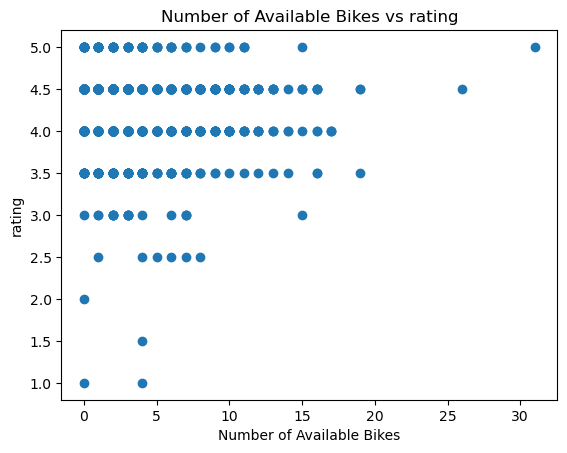

In [23]:
plt.scatter(df['Number of Available Bikes'], df['rating'])
plt.title('Number of Available Bikes vs rating')
plt.xlabel('Number of Available Bikes')
plt.ylabel('rating')

## Finding out whether or not there is a correlation between the number of bikes available and the rating 

In [27]:
correlation = df['Number of Available Bikes'].corr(df['rating'])

print(f"Pearson Correlation Coefficient: {correlation}")


Pearson Correlation Coefficient: -0.012336600742169825


The coefficient indicates that there's almost no linear relationship between the number of bikes available and the rating. This implies that changes in the number of bikes available aren't linked to any noticeable directional change in the rating, as determined by this particular linear correlation analysis.

Text(0, 0.5, 'rating')

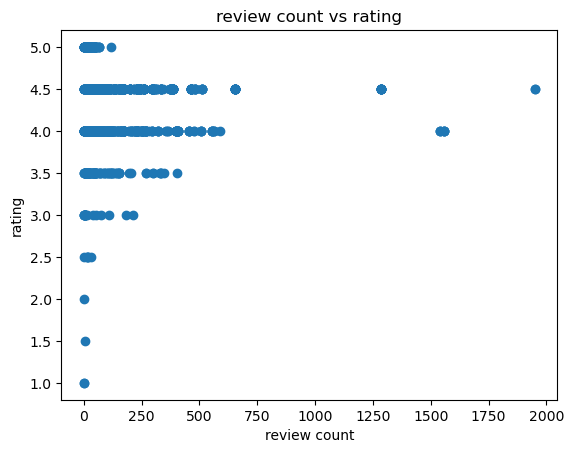

In [31]:
plt.scatter(df['review count'], df['rating'])
plt.title('review count vs rating')
plt.xlabel('review count')
plt.ylabel('rating')

In [32]:
correlation = df['review count'].corr(df['rating'])

print(f"Pearson Correlation Coefficient: {correlation}")


Pearson Correlation Coefficient: 0.030275910713145948


This indicates that there's almost no linear relationship between the variables 'categories' and 'rating'. This means that changes in 'categories' are not notably associated with directional changes in 'rating', based on this specific linear correlation analysis.

Text(0, 0.5, 'rating')

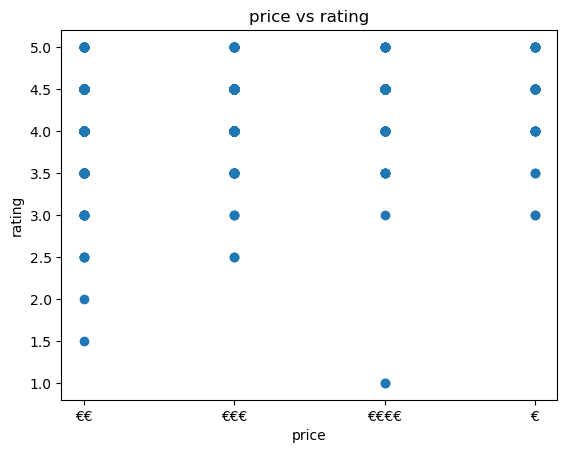

In [33]:
plt.scatter(df['price'], df['rating'])
plt.title('price vs rating')
plt.xlabel('price')
plt.ylabel('rating')

Text(0, 0.5, 'review count')

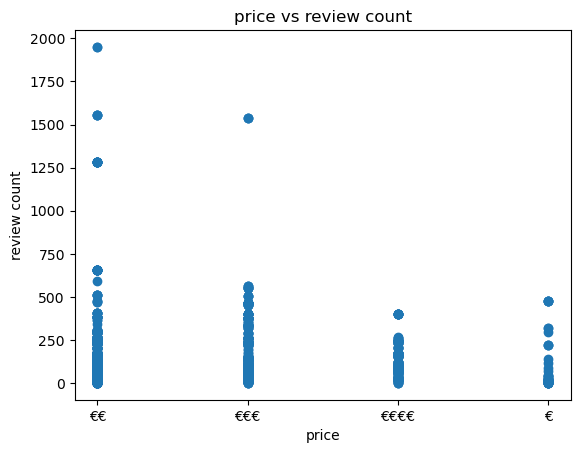

In [34]:
plt.scatter(df['price'], df['review count'])
plt.title('price vs review count')
plt.xlabel('price')
plt.ylabel('review count')

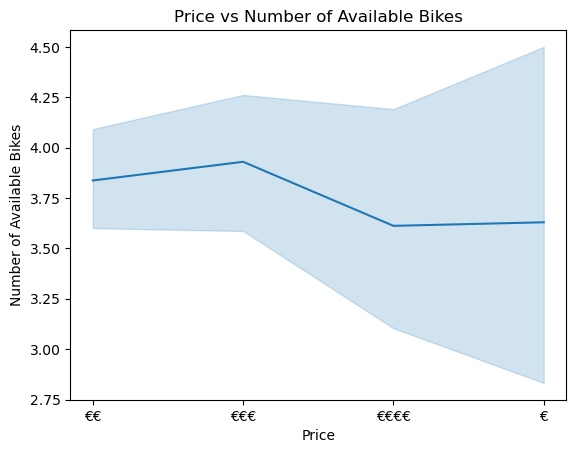

In [50]:
import seaborn as sns

sns.lineplot(x='price', y='Number of Available Bikes', data=df)
plt.title('Price vs Number of Available Bikes')
plt.xlabel('Price')
plt.ylabel('Number of Available Bikes')
plt.show()


Text(0, 0.5, 'review count')

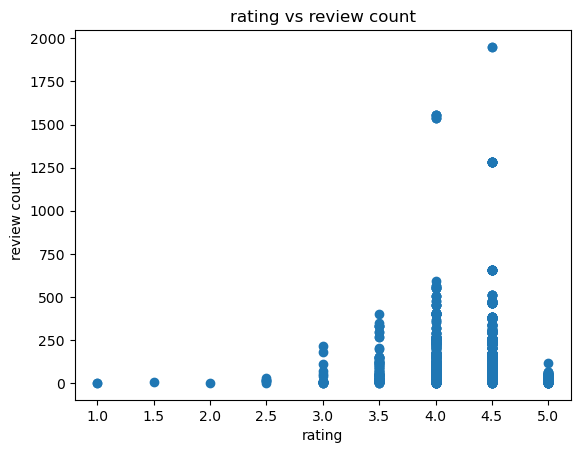

In [39]:
plt.scatter(df['rating'], df['review count'])
plt.title('rating vs review count')
plt.xlabel('rating')
plt.ylabel('review count')

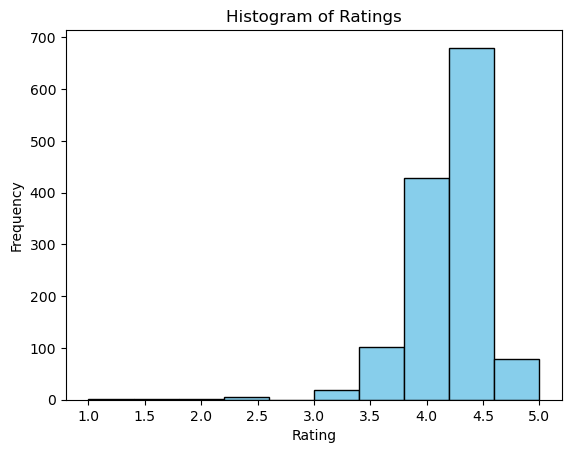

In [42]:
plt.hist(df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()


 left skewed  

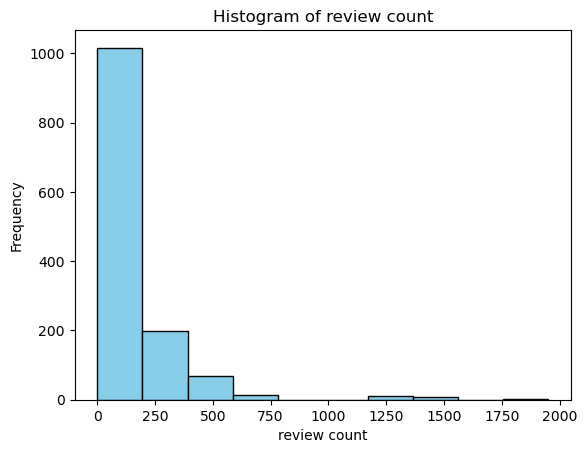

In [43]:
plt.hist(df['review count'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('review count')
plt.ylabel('Frequency')
plt.title('Histogram of review count')
plt.show()


 right skewed  

## Part 4: Building a Model

In [62]:
import statsmodels.api as sm

X = df['Number of Available Bikes']
y = df['rating']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2000
Date:                Sun, 19 Nov 2023   Prob (F-statistic):              0.655
Time:                        00:50:32   Log-Likelihood:                -778.95
No. Observations:                1316   AIC:                             1562.
Df Residuals:                    1314   BIC:                             1572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [63]:
import statsmodels.api as sm

X = df['Number of Available Bikes']
y = df['review count']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           review count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.300
Date:                Sun, 19 Nov 2023   Prob (F-statistic):              0.254
Time:                        00:52:44   Log-Likelihood:                -8904.8
No. Observations:                1316   AIC:                         1.781e+04
Df Residuals:                    1314   BIC:                         1.782e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

squared and Adjusted R-squared:
Close to zero in both cases.
Indicates almost no relationship between 'Number of Available Bikes' and either 'rating' or 'review count'.
Coefficients:
Non-significant (p-value > 0.05).
Suggests no meaningful linear connection between 'Number of Available Bikes' and either 'rating' or 'review count'.
In essence, both models demonstrate almost no association between the 'Number of Available Bikes' and either 'rating' or 'review count'.